In [1]:
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

Cloning into 'mmsegmentation'...


In [2]:
import os
os.chdir('mmsegmentation')

In [3]:
%pwd

'c:\\Users\\Roger\\Desktop\\OpenMMLabCourseStudy\\11. 西瓜语义分割\\release\\mmsegmentation'

In [5]:

%pip install -v -e .

Using pip 23.0.1 from c:\Users\Roger\anaconda3\envs\mmlab\lib\site-packages\pip (python 3.8)
Obtaining file:///C:/Users/Roger/Desktop/OpenMMLabCourseStudy/11.%20%E8%A5%BF%E7%93%9C%E8%AF%AD%E4%B9%89%E5%88%86%E5%89%B2/release/mmsegmentation
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mmsegmentation
    Found existing installation: mmsegmentation 1.0.0
    Uninstalling mmsegmentation-1.0.0:
      Removing file or directory c:\users\roger\anaconda3\envs\mmlab\lib\site-packages\mmsegmentation.egg-link
      Removing pth entries from c:\users\roger\anaconda3\envs\mmlab\lib\site-packages\easy-install.pth:
      Removing entry: c:\users\roger\desktop\openmmlabcoursestudy\11. 西瓜语义分割\release\mmsegmentation
      Successfully uninstalled mmsegmentation-1.0.0
  Running setup.py develop for mmsegmentation
Note: you may need to restart the kernel to use updated packages.


  Running command python setup.py egg_info
  running egg_info
  creating C:\Users\Roger\AppData\Local\Temp\pip-pip-egg-info-toycxina\mmsegmentation.egg-info
  writing C:\Users\Roger\AppData\Local\Temp\pip-pip-egg-info-toycxina\mmsegmentation.egg-info\PKG-INFO
  writing dependency_links to C:\Users\Roger\AppData\Local\Temp\pip-pip-egg-info-toycxina\mmsegmentation.egg-info\dependency_links.txt
  writing requirements to C:\Users\Roger\AppData\Local\Temp\pip-pip-egg-info-toycxina\mmsegmentation.egg-info\requires.txt
  writing top-level names to C:\Users\Roger\AppData\Local\Temp\pip-pip-egg-info-toycxina\mmsegmentation.egg-info\top_level.txt
  writing manifest file 'C:\Users\Roger\AppData\Local\Temp\pip-pip-egg-info-toycxina\mmsegmentation.egg-info\SOURCES.txt'
  reading manifest file 'C:\Users\Roger\AppData\Local\Temp\pip-pip-egg-info-toycxina\mmsegmentation.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file 'C:\Users\Rog

可视化数据集

In [2]:

import os
os.chdir('./mmsegmentation')

In [3]:
%pwd

'c:\\Users\\Roger\\Desktop\\OpenMMLabCourseStudy\\11. 西瓜语义分割\\release\\mmsegmentation'

In [4]:
from mmengine import Config
cfg = Config.fromfile('./configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py')

In [5]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = './work_dirs/watermalon'

# 训练迭代次数
cfg.train_cfg.max_iters = 3000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1500

# 随机数种子
cfg['randomness'] = dict(seed=0)

In [6]:
cfg.dump('pspnet-DubaiDataset_20230612.py')

In [18]:
import numpy as np

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine

In [19]:
from mmengine import Config
cfg = Config.fromfile('pspnet-DubaiDataset_20230612.py')

In [9]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/16 22:18:40 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 4090
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    MSVC: n/a, reason: fileno
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode

c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/16 22:18:41 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/16 22:18:41 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [26]:
runner.train()

06/16 22:50:45 - mmengine - INFO - Checkpoints will be saved to c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\work_dirs\watermalon.
06/16 22:50:51 - mmengine - INFO - Iter(train) [1300/3000]  lr: 9.7102e-03  eta: 0:27:22  time: 0.0684  data_time: 0.0054  memory: 3343  loss: 0.0375  decode.loss_ce: 0.0261  decode.acc_seg: 83.4381  aux.loss_ce: 0.0114  aux.acc_seg: 87.9913
06/16 22:50:58 - mmengine - INFO - Iter(train) [1400/3000]  lr: 9.6878e-03  eta: 0:13:45  time: 0.0651  data_time: 0.0015  memory: 3343  loss: 0.0341  decode.loss_ce: 0.0242  decode.acc_seg: 79.9866  aux.loss_ce: 0.0098  aux.acc_seg: 80.8929
06/16 22:51:05 - mmengine - INFO - Iter(train) [1500/3000]  lr: 9.6655e-03  eta: 0:09:10  time: 0.0652  data_time: 0.0016  memory: 3343  loss: 0.0362  decode.loss_ce: 0.0248  decode.acc_seg: 86.8591  aux.loss_ce: 0.0114  aux.acc_seg: 85.2692
06/16 22:51:05 - mmengine - INFO - Saving checkpoint at 1500 iterations
06/16 22:51:13 - mmengine - INFO - Ite

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

可视化训练日志

In [28]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

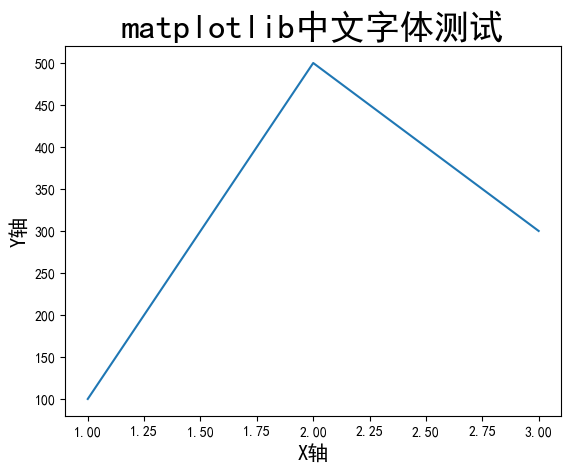

In [29]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

In [30]:

os.getcwd()

'c:\\Users\\Roger\\Desktop\\OpenMMLabCourseStudy\\11. 西瓜语义分割\\release\\mmsegmentation'

In [40]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
log_path = 'work_dirs/watermalon/20230616_221839/vis_data/scalars.json'

In [34]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [35]:
len(json_list)

34

In [36]:

eval(json_list[4])

{'lr': 0.0098887753171919,
 'data_time': 0.0038002490997314452,
 'loss': 0.05441257208585739,
 'decode.loss_ce': 0.037356069311499596,
 'decode.acc_seg': 89.2852783203125,
 'aux.loss_ce': 0.017056502867490053,
 'aux.acc_seg': 86.8682861328125,
 'time': 0.0684999942779541,
 'memory': 3343,
 'step': 500}

In [41]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = pd.concat([df_test, pd.DataFrame([eval(each)])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame([eval(each)])], ignore_index=True)

In [42]:

df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,memory,step
0,0.009978,0.001500,0.069270,0.046559,67.703247,0.022711,70.507812,0.065308,19513,100
1,0.009956,0.001400,0.060724,0.042343,70.492554,0.018382,65.606689,0.064658,3343,200
2,0.009933,0.001800,0.062955,0.044242,73.889160,0.018713,77.081299,0.065000,3343,300
3,0.009911,0.001301,0.063023,0.044928,76.849365,0.018095,72.793579,0.064669,3343,400
4,0.009889,0.003800,0.054413,0.037356,89.285278,0.017057,86.868286,0.068500,3343,500
5,0.009866,0.009676,0.057480,0.040238,76.376343,0.017242,67.105103,0.072664,3343,600
6,0.009844,0.001800,0.045555,0.031581,85.339355,0.013974,81.753540,0.064538,3343,700
7,0.009822,0.001700,0.051713,0.036981,70.336914,0.014732,73.522949,0.064631,3343,800
8,0.009800,0.007001,0.041314,0.029030,87.106323,0.012284,84.777832,0.070266,3343,900
9,0.009777,0.001401,0.057906,0.041040,72.213745,0.016866,69.314575,0.065116,3343,1000


In [44]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,71.19,42.22,51.56,0.000915,0.409645,1600
1,69.08,35.86,43.36,0.000909,0.047595,2000
2,66.59,38.27,46.88,0.001005,0.047345,2400
3,74.69,44.21,50.96,0.000800,0.047486,2800


In [45]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [46]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

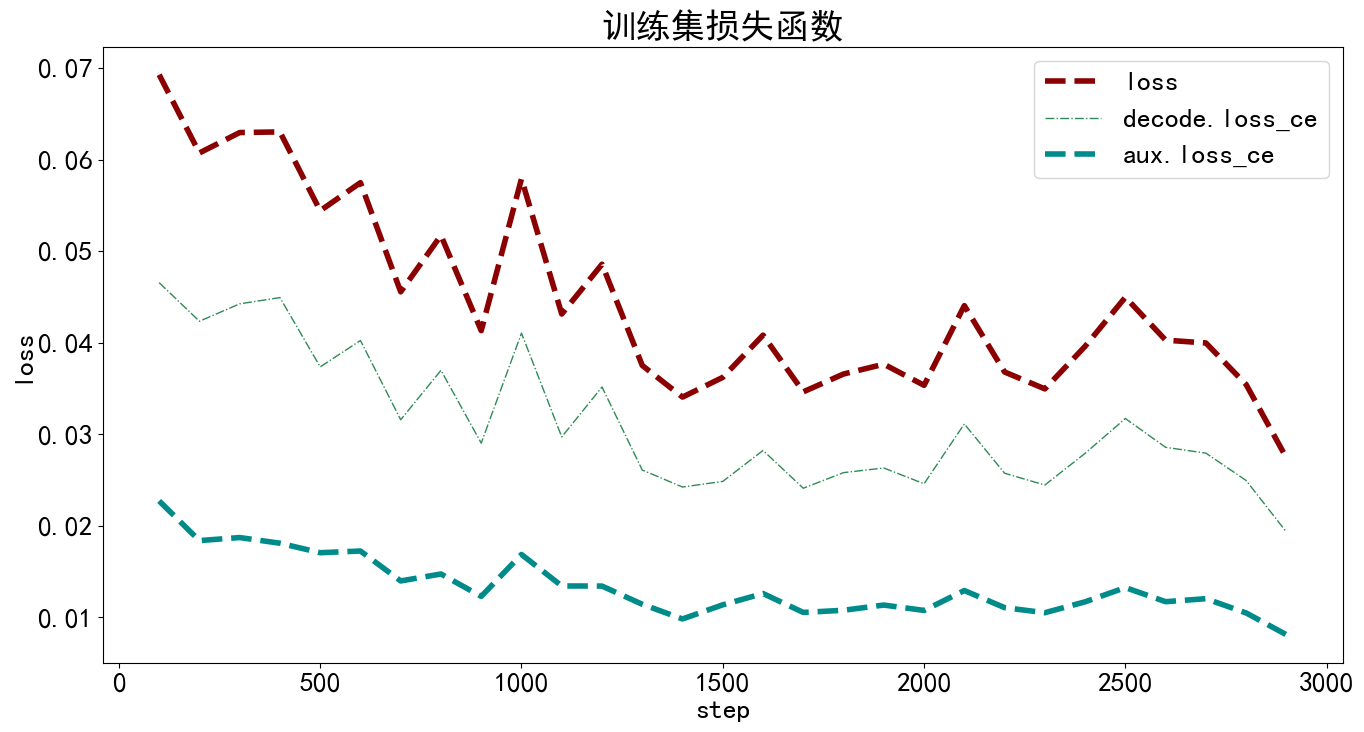

In [48]:
plt.figure(figsize=(16, 8))

x = df_train['step'].values
for y in metrics:
    plt.plot(x, df_train[y].values, label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [49]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'memory', 'step'],
      dtype='object')

In [50]:

metrics = ['decode.acc_seg', 'aux.acc_seg']

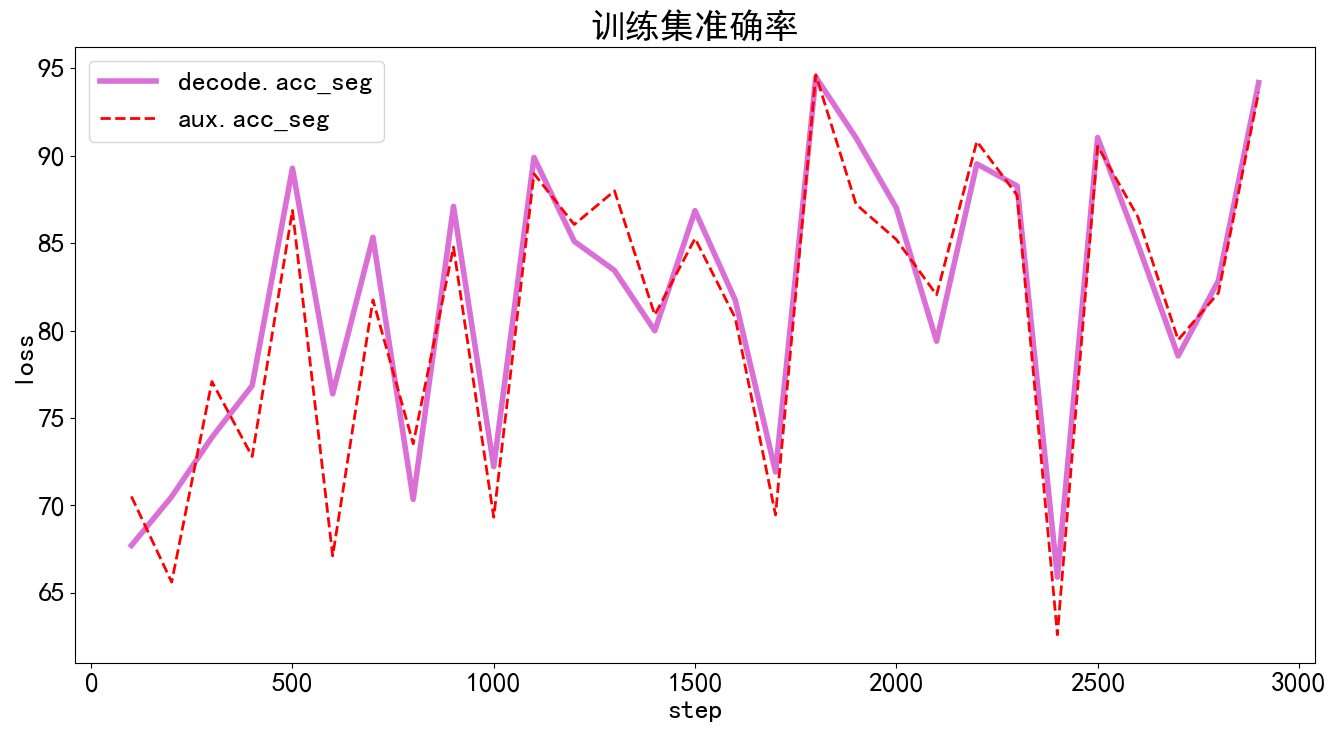

In [52]:
plt.figure(figsize=(16, 8))

x = df_train['step'].values
for y in metrics:
    plt.plot(x, df_train[y].values, label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [53]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [54]:
metrics = ['aAcc', 'mIoU', 'mAcc']

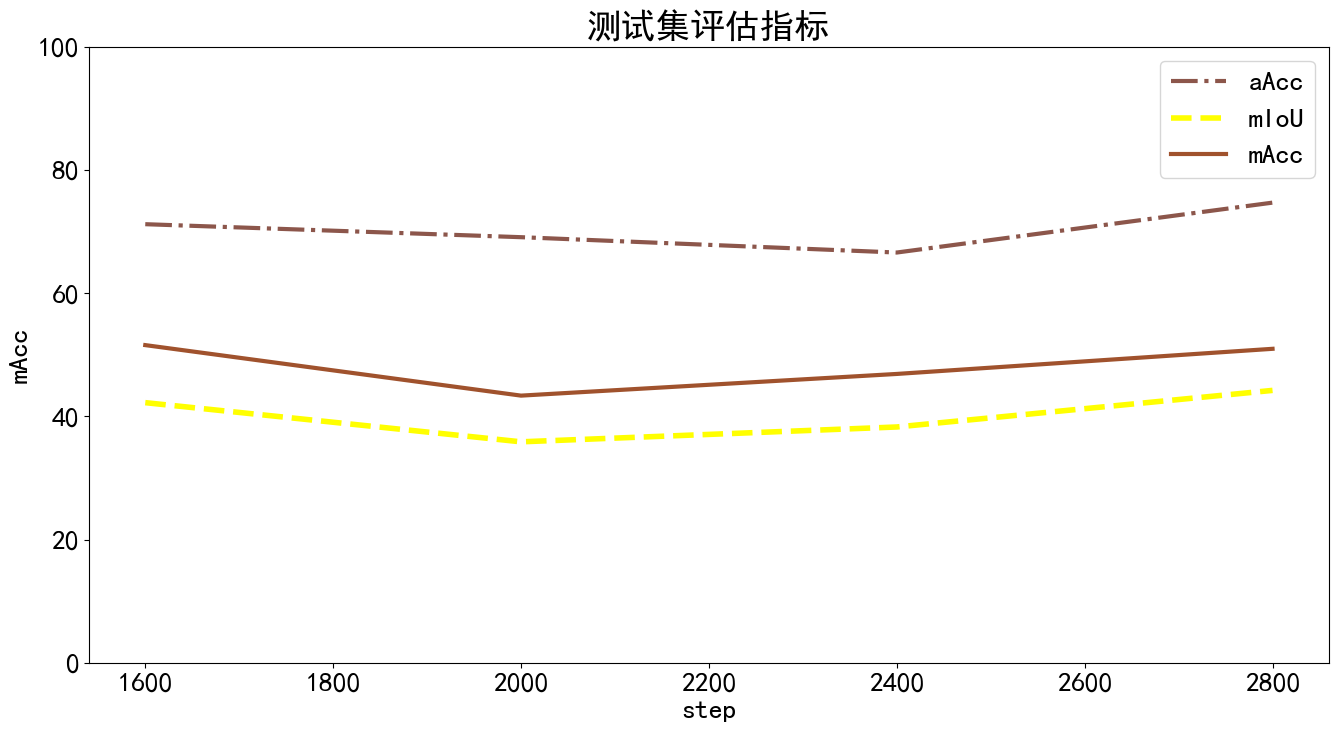

In [55]:
plt.figure(figsize=(16, 8))

x = df_test['step'].values
for y in metrics:
    plt.plot(x, df_test[y].values, label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

预测

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

In [57]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('pspnet-DubaiDataset_20230612.py')

In [58]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/16 23:31:24 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 4090
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    MSVC: n/a, reason: fileno
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode

c:\Users\Roger\anaconda3\envs\mmlab\lib\site-packages\mmengine\utils\manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_i

06/16 23:31:25 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/16 23:31:25 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [59]:
checkpoint_path = './work_dirs/watermalon/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\Roger\Desktop\OpenMMLabCourseStudy\11. 西瓜语义分割\release\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/watermalon/iter_3000.pth


In [60]:
img = mmcv.imread('./pics/xigua.jpg')

In [61]:
result = inference_model(model, img)

In [62]:
result.keys()

['pred_sem_seg', 'seg_logits']

In [63]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [64]:
pred_mask.shape

(450, 800)

In [65]:

np.unique(pred_mask)

array([0, 1, 2, 3, 4, 5], dtype=int64)

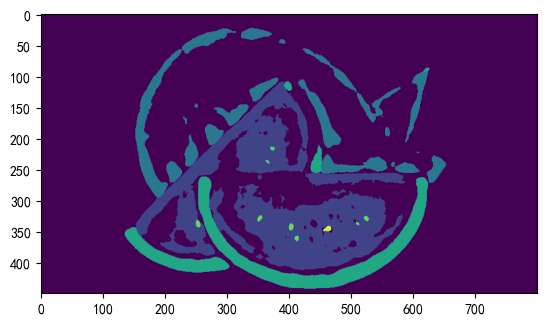

In [66]:
plt.imshow(pred_mask)
plt.show()

06/16 23:38:09 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


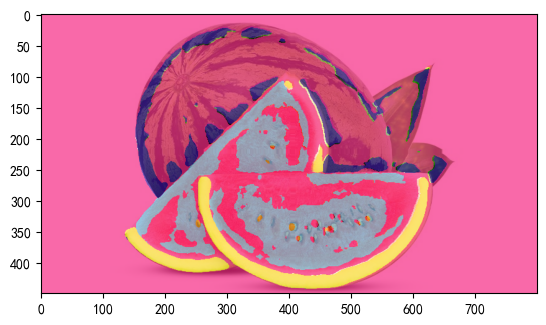

In [67]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

In [82]:
label = mmcv.imread('./pics/xigua.jpg')

In [83]:

label.shape

(450, 800, 3)

In [84]:
label_mask = label[:,:,0]

In [85]:
label_mask.shape

(450, 800)

In [86]:
np.unique(label_mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

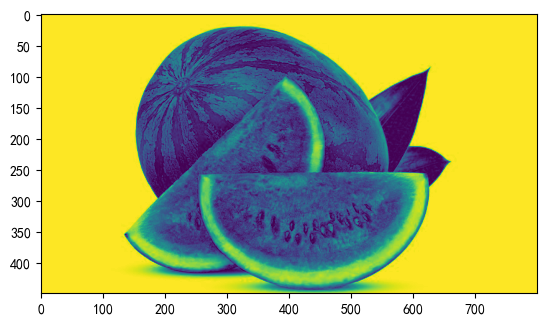

In [87]:
plt.imshow(label_mask)
plt.show()

In [88]:
# 测试集标注
label_mask.shape


(450, 800)

In [89]:
# 语义分割预测结果
pred_mask.shape

(450, 800)

In [90]:
# 真实为前景，预测为前景
TP = (label_mask == 1) & (pred_mask==1)
# 真实为背景，预测为背景
TN = (label_mask == 0) & (pred_mask==0)
# 真实为前景，预测为背景
FN = (label_mask == 1) & (pred_mask==0)
# 真实为背景，预测为前景
FP = (label_mask == 0) & (pred_mask==1)

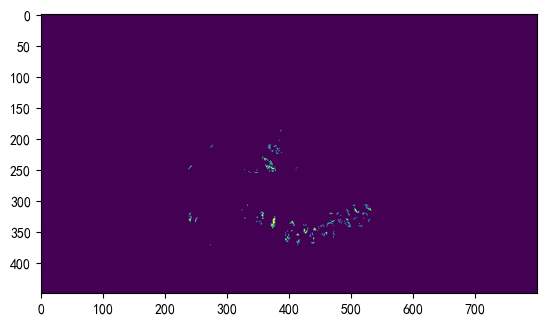

In [96]:
plt.imshow(FP)
plt.show()

In [92]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 30

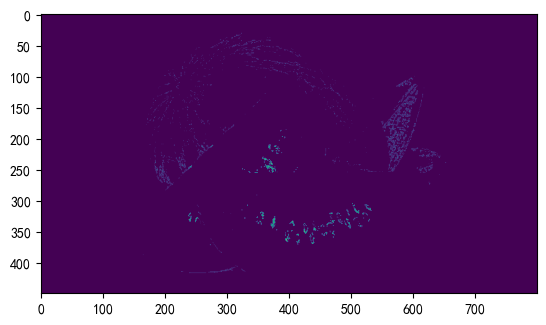

In [93]:
plt.imshow(confusion_map)
plt.show()

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())
confusion_matrix_model


array([[  3571,    589,   1576, ...,      0,      0,      0],
       [   603,     62,    236, ...,      0,      0,      0],
       [   658,     49,    274, ...,      0,      0,      0],
       ...,
       [  2785,      0,      2, ...,      0,      0,      0],
       [  1138,      0,      0, ...,      0,      0,      0],
       [181459,      0,      4, ...,      0,      0,      0]], dtype=int64)

In [99]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

In [103]:
classes = ['red', 'green', 'white', 'seed-black', 'seed-white']

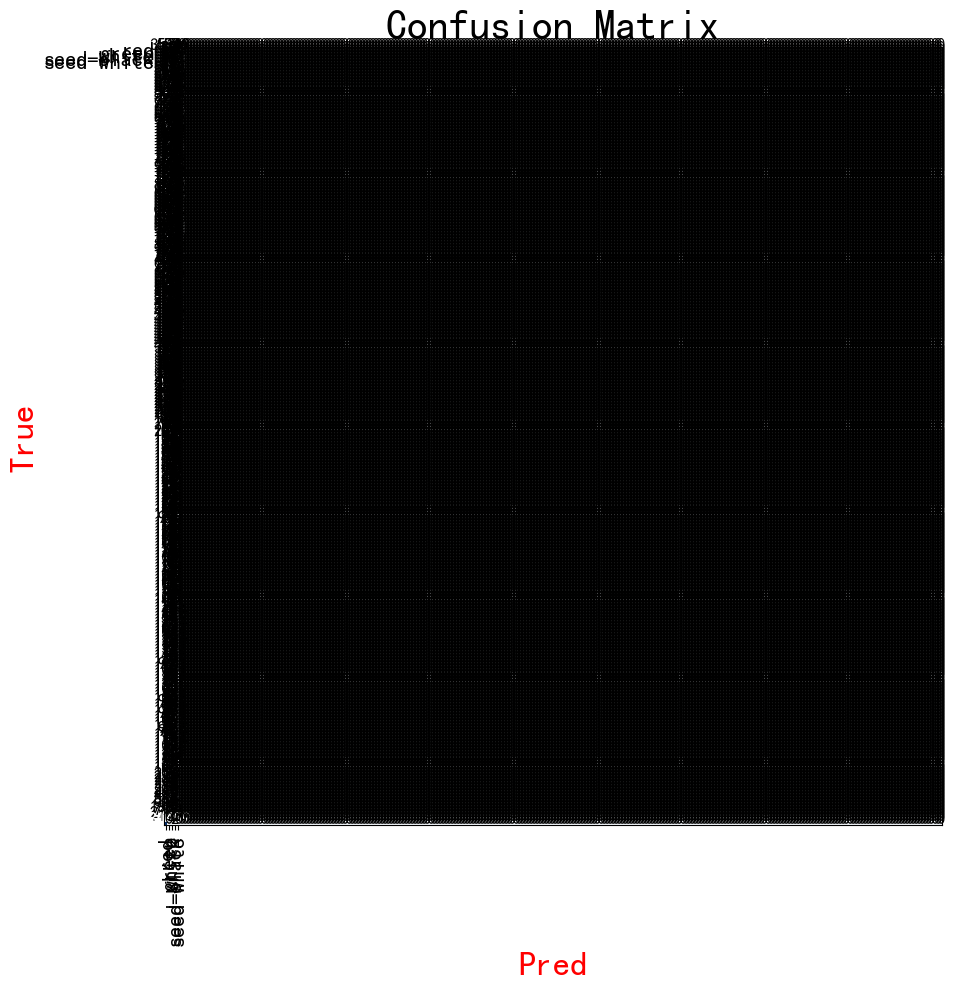

In [104]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')